# Clustering Stars by Temperature and Luminosity on the Hertzsprung-Russell Diagram

In [82]:
# load all libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering



/Users/jaxon/miniconda3/envs/myenv1/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


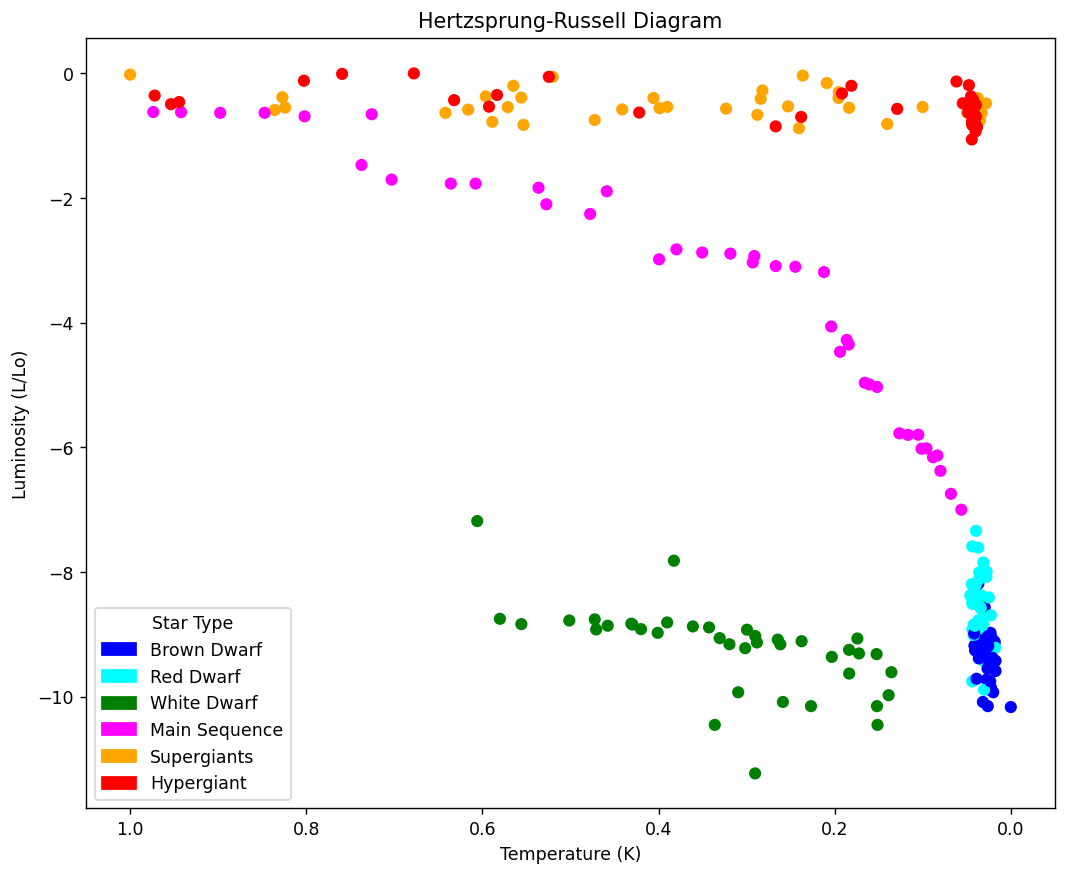

In [ ]:
# Load the dataset
data = pd.read_csv('6 class csv.csv')
data['Spectral Class'] = data['Spectral Class'].str.strip()

# Select columns to normalize
columns = ['Temperature(K)', 'Luminosity(L/Lo)']

scaler = MinMaxScaler()
data[columns] = scaler.fit_transform(data[columns])

# Save the normalized data
data.to_csv('normalized6class.csv', index=False)
dataN = pd.read_csv('normalized6class.csv')

# Select columns to print
x1 = data['Temperature(K)']
y1 = data['Luminosity(L/Lo)']

# Apply log base 10 transformation to y1
y1_log = np.log10(y1)

# Define the range of the plot
maxX1 = max(x1)
minX1 = min(x1)
maxY1 = max(y1_log)
minY1 = min(y1_log)

# Define a color map for spectral types
color_map = {
    0: 'blue',
    1: 'cyan',
    2: 'green',
    3: 'magenta',
    4: 'orange',
    5: 'red'
}

label_map = {
    0: 'Brown Dwarf',
    1: 'Red Dwarf',
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Supergiants',
    5: 'Hypergiant'
}

# Assign colors based on spectral types
colors = [color_map.get(sp, 'black') for sp in data['Star type']]

# Create a scatter plot
plt.figure(figsize=(10, 8), dpi=125)
plt.scatter(x1, y1_log, c=colors)

# Add labels and title
plt.xlabel('Temperature (K)')
plt.ylabel('Log(10) Luminosity (L/Lo)')
plt.title('Hertzsprung-Russell Diagram')

# Create custom legend
legend_patches = [mpatches.Patch(color=color, label=label_map[star_type]) for star_type, color in color_map.items()]
plt.legend(handles=legend_patches, title='Star Type')

plt.gca().invert_xaxis()

plt.show()

/Users/jaxon/miniconda3/envs/myenv1/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/jaxon/miniconda3/envs/myenv1/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


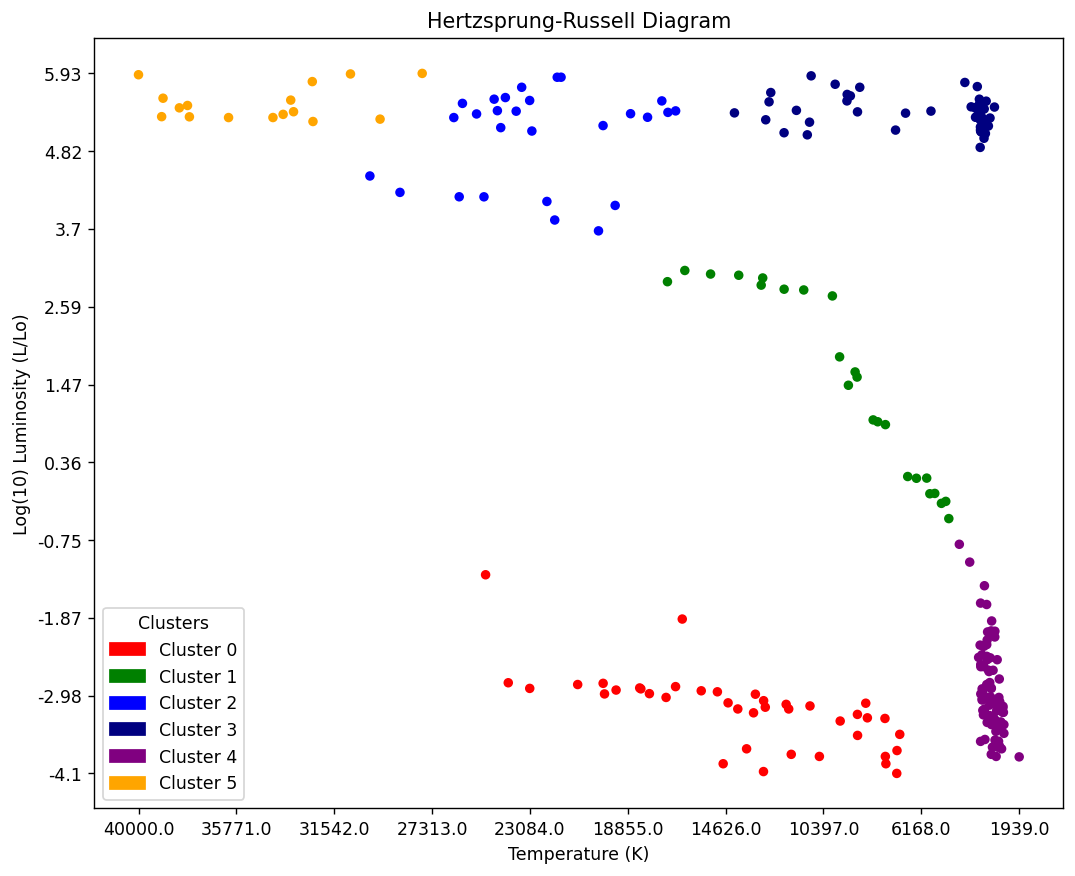

In [94]:
# Read the CSV file
df = pd.read_csv("6 class csv.csv")
    
# Remove rows where 'Luminosity(L/Lo)' is null
df = df.dropna(subset=['Luminosity(L/Lo)'])

# Apply log base 10 transformation to 'Luminosity(L/Lo)'
df['Luminosity(L/Lo)'] = np.log10(df['Luminosity(L/Lo)'])

# Remove rows where 15000 < Temperature(K) < 15100
df = df[~df['Temperature(K)'].between(15000, 15100)]

# Get the min and max values of 'Temperature(K)' and 'Luminosity(L/Lo)'
maxX = max(df['Temperature(K)'])
minX = min(df['Temperature(K)'])
maxY = max(df['Luminosity(L/Lo)'])
minY = min(df['Luminosity(L/Lo)'])
    
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
    
# Normalize the 'Temperature(K)' and 'Luminosity(L/Lo)' columns
df[['Temperature(K)', 'Luminosity(L/Lo)']] = scaler.fit_transform(df[['Temperature(K)', 'Luminosity(L/Lo)']])

# Output the result to a new CSV file
df.to_csv("normalized6class.csv", index=False)

dataC = pd.read_csv('normalized6class.csv')

x = pd.DataFrame(dataC, columns=['Temperature(K)', 'Luminosity(L/Lo)'])
y = pd.DataFrame(dataC, columns=['Star type'])

# Apply Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=6)
predicted = model.fit_predict(x)

# plot kmeans obtained groups
plt.figure(figsize=(10, 8), dpi=125)
colors = np.array(['red', 'green', 'blue', 'navy', 'purple', 'orange'])
predicted = np.choose(model.labels_, [0,1,2,3,4,5]).astype(np.int64)

plt.scatter(x['Temperature(K)'], x['Luminosity(L/Lo)'], c=colors[predicted], s=20)

x_ticks = np.linspace(minX, maxX, num=10)
y_ticks = np.linspace(minY, maxY, num=10)

# # Transform the ticks using the scaler
x_ticks_transformed = scaler.transform(np.column_stack((x_ticks, np.zeros_like(x_ticks))))[:, 0]
y_ticks_transformed = scaler.transform(np.column_stack((np.zeros_like(y_ticks), y_ticks)))[:, 1]

plt.xticks(ticks=x_ticks_transformed, labels=np.round(x_ticks, 2))
plt.yticks(ticks=y_ticks_transformed, labels=np.round(y_ticks, 2))

# Create custom legend
legend_labels = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2',
    3: 'Cluster 3',
    4: 'Cluster 4',
    5: 'Cluster 5'
}

# Add labels and title
plt.xlabel('Temperature (K)')
plt.ylabel('Log(10) Luminosity (L/Lo)')
plt.title('Hertzsprung-Russell Diagram')
legend_patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(6)]
plt.legend(handles=legend_patches, title='Clusters')

plt.gca().invert_xaxis()

plt.show()

In [ ]:
# Error checking 
error1 = np.sum(np.abs(model.labels_ - dataC['Star type']))
print('Starting Error:', error1)

# store the predicted labels and error
ypred = pd.DataFrame(model.labels_, columns=['Star type'])
error = error1

temp = np.zeros(model.labels_.shape)
pos0 = np.where(model.labels_==0) # white dwards
pos1 = np.where(model.labels_==1) # main sequence
pos2 = np.where((model.labels_==2) | (model.labels_==3) | (model.labels_==5)) # hypergiants supergiants
pos3 = np.where(model.labels_==4) # brown dwarfs red dwarfs

temp[pos0] = 2
temp[pos1] = 3
temp[pos2] = 0
temp[pos3] = 1

temp1 = temp.astype(int)

temp2 = np.zeros(dataC['Star type'].shape)
pos_0 = np.where((dataC['Star type']==4) | (dataC['Star type']==5)) # hypergiants and supergiants
pos_1 = np.where((dataC['Star type']==0) | (dataC['Star type']==1)) # brown dwarfs and red dwarfs
pos_2 = np.where(dataC['Star type']==2) # white dwarfs
pos_3 = np.where(dataC['Star type']==3) # main sequence

temp2[pos_0] = 0
temp2[pos_1] = 1
temp2[pos_2] = 2
temp2[pos_3] = 3

temp3 = temp2.astype(int)

# calculate the error
error2 = np.sum(np.abs(temp1 - temp3))
print("Error after relabeling: ", error2)

Starting Error: 557
Error with labels:  46
